In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
missing_values = ['N/A', 'na', 'NA', '--', ' ', '  ', 'n/a']

In [3]:
weather_data = pd.read_csv('delhi-weather-data/testset.csv',na_values=missing_values)

In [4]:
weather_data['datetime_utc'] = pd.to_datetime(weather_data['datetime_utc'])

In [5]:
weather_data.set_index('datetime_utc',inplace=True)

In [6]:
conditions = weather_data[' _conds']

In [7]:
to_drop = [' _precipm', ' _windchillm', ' _wgustm', ' _tornado', ' _hail', ' _snow', ' _heatindexm']

In [8]:
weather_data.drop(columns=to_drop, inplace=True)

In [9]:
weather_data = weather_data.fillna(weather_data.mean())

In [10]:
weather_data = weather_data.resample('D').mean()

In [11]:
from scipy import stats
idx = np.all(stats.zscore(weather_data) < 3, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


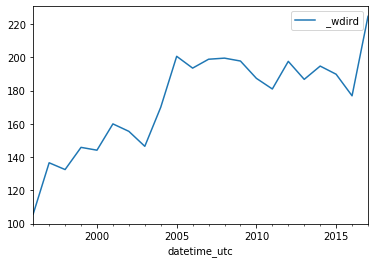

In [12]:
weather_data.resample('Y').mean().plot(y=' _wdird')

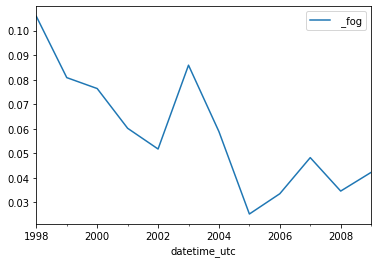

In [13]:
weather_data.resample('Y').mean()[2:14].plot(y=' _fog')

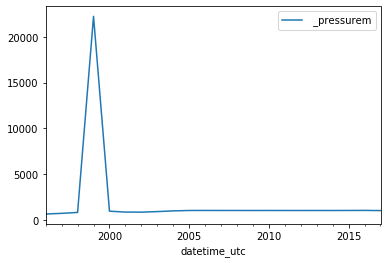

In [14]:
weather_data.resample('Y').mean()[:30].plot(y=' _pressurem')

In [15]:
data = {}
for ind,val in conditions.items():
    month = format( str(ind.month), ">02" )
    year = str(ind.year)
    key = year+'/'+month
    if data.get(key) == None:
        data[key] = {}
    if data[key].get(val) == None:
        data[key][val] = 0
    data[key][val] += 1
    
        

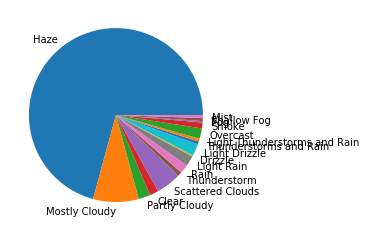

In [16]:
y = list(data['1998/09'].values())
x = list(data['1998/09'].keys())
plt.pie(y,labels=x)
plt.show()

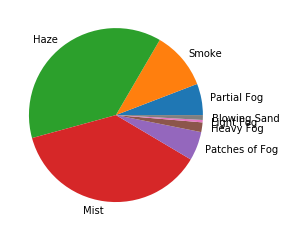

In [17]:
y = list(data['2015/02'].values())
x = list(data['2015/02'].keys())
plt.pie(y,labels=x)
plt.show()